# Click Analysis Workings

Start by importing the data and performing the cleanup parts we worked out in the EDA workbook

In [16]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(25, 8)})
%matplotlib inline

# import dataset and view head
df = pd.read_csv('data/yoco/capital_events_case_study.csv')

# set timestamp to correct data type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Remove nulls as there are only 5 a very small percentage
df=df.dropna()

# Dop duplicate rows as there is only 1
df.drop_duplicates(inplace=True)

# filter frame to Aug, Sep & Oct only - full months analysis only
df = df[(df['timestamp'] >= '2020-08-01') & (df['timestamp'] <= '2020-10-31')]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20983 entries, 0 to 24774
Data columns (total 4 columns):
timestamp             20983 non-null datetime64[ns]
event                 20983 non-null object
user_id               20983 non-null object
context_os_version    20983 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 819.6+ KB


In [17]:
# Lets confirm the unique values
df['user_id'].nunique()

3747

In [18]:
df['event'].nunique()

9

In [19]:
df['context_os_version'].nunique()

66

In [20]:
# Investigate the events
df.groupby('event')['user_id'].count().sort_values(ascending=False)

event
pos_home_capital_card_pressed           18698
pos_capital_button_let_me_know            801
pos_capital_button_get_cash_advance       508
pos_capital_button_continue               446
pos_capital_button_accept_offer           261
pos_capital_link_view_offer_contract      157
pos_capital_link_view_offer_tos            56
pos_capital_button_decline_offer           52
pos_capital_button_get_more_capital         4
Name: user_id, dtype: int64

### For end users of the report, lets map the events to a description from the user journey doc

In [21]:
# copy events column
df['event_name'] = df['event']
# Replace multiple values with multiple new values for an individual DataFrame column:
oldnames = ['pos_home_capital_card_pressed',
            'pos_capital_button_let_me_know',
            'pos_capital_button_get_cash_advance',
            'pos_capital_button_continue',
            'pos_capital_button_accept_offer',
            'pos_capital_link_view_offer_contract',
            'pos_capital_link_view_offer_tos',
            'pos_capital_button_decline_offer',
            'pos_capital_button_get_more_capital']

newnames = ['Merchants Opening Capital Tab',
           'Let me know Button clicked',
           'Get cash advance Button clicked',
           'Continue clicked',
           'Accept Offer clicked',
           'View Contract clicked',
           'Read full agreement clicked',
           'Decline Offer clicked',
           'Get more capital clicked']


df['event_name'] = df['event_name'].replace(oldnames,newnames)

## Daily Clicks

In [22]:
df = df.set_index('timestamp')

# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Date'] = df.index.date
df['Weekday Name'] = df.index.weekday_name

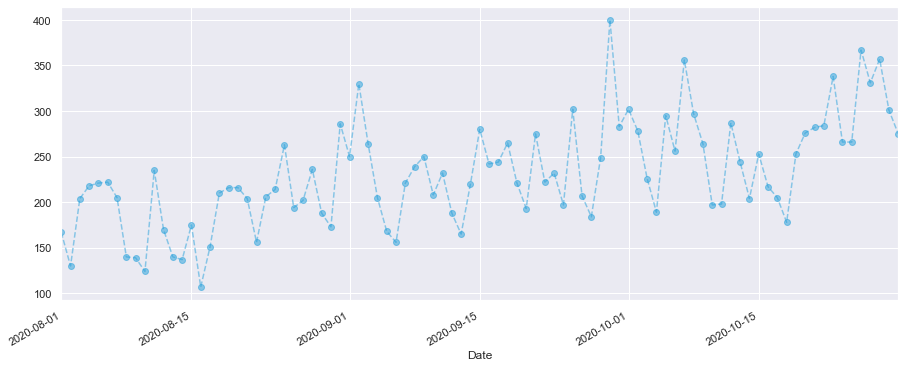

In [23]:
eventcounts = df.groupby('Date')['user_id'].count()
eventcounts.plot(marker='o', alpha=0.5, linestyle='--', figsize=(15, 6), subplots=True, color='#24a0db');

### View over specific events

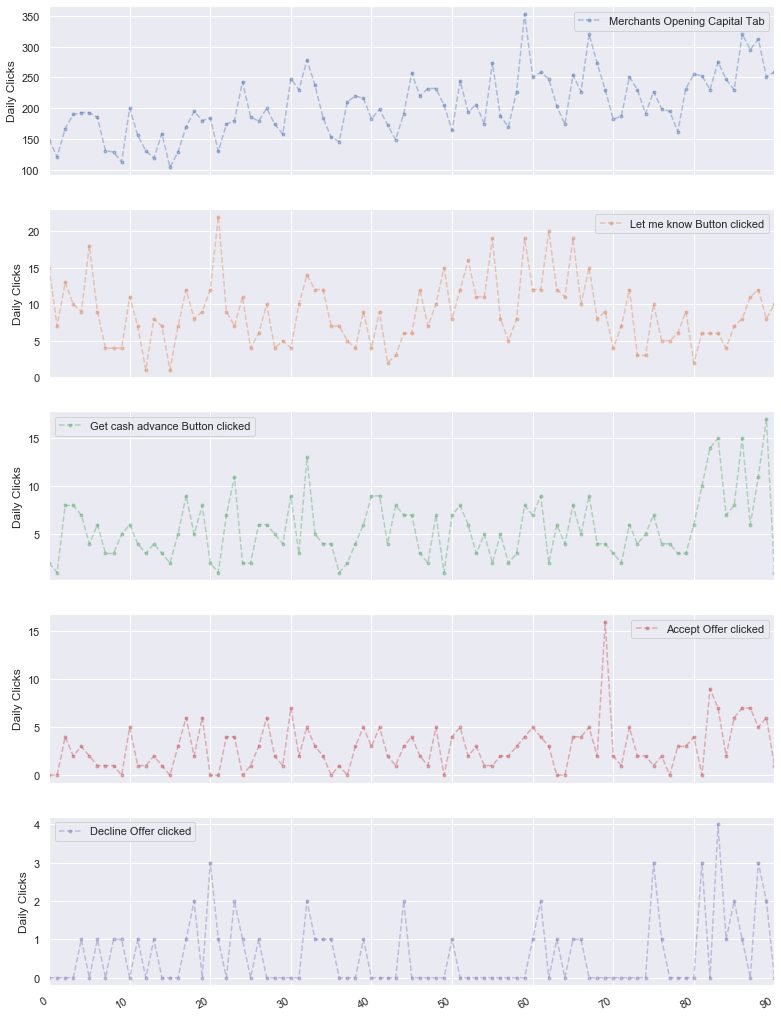

In [24]:
data = [df["Date"], df["event_name"]]
headers = ["Date", "event_name"]
multi = pd.concat(data, axis=1, keys=headers)
testdf = multi.groupby(['Date','event_name']).size().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)

# lets ignore specific events and focus on acceptance, decline, let me know
cols_plot = ['Merchants Opening Capital Tab',
           'Let me know Button clicked',
           'Get cash advance Button clicked',
           'Accept Offer clicked',
           'Decline Offer clicked']


axes = testdf[cols_plot].plot(marker='.', alpha=0.4, linestyle='--', figsize=(13, 20), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Clicks')

### Monthly Views

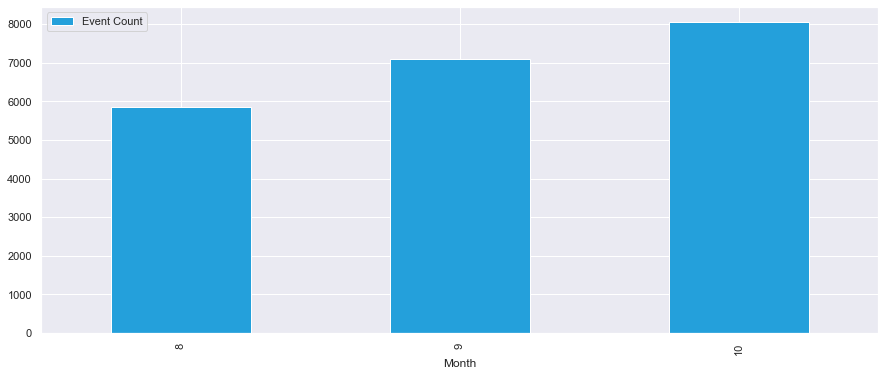

In [25]:
mnth = df.groupby( [ "Month"] )['user_id'].count().reset_index()
mnth.columns = ['Month', 'Event Count']
mnth = mnth.set_index('Month')
mnth.plot.bar(figsize=(15, 6),color='#24a0db')

### Weekday Views

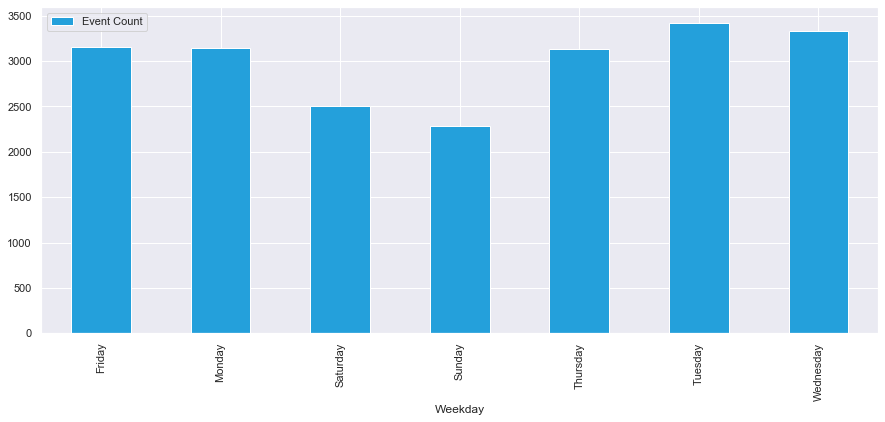

In [26]:
wk_day = df.groupby( [ "Weekday Name"] )['user_id'].count().reset_index()
wk_day.columns = ['Weekday', 'Event Count']
wk_day = wk_day.set_index('Weekday')
wk_day.plot.bar(figsize=(15, 6),color='#24a0db')

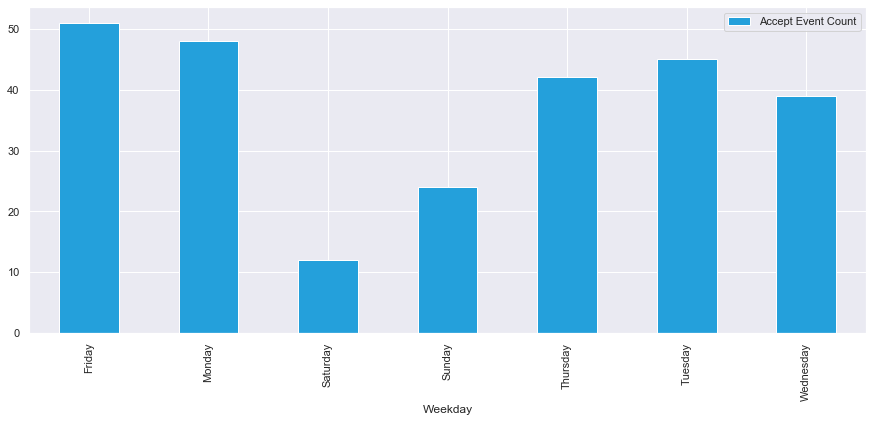

In [27]:
#filter the dataframe down to accept events only
step = ['Accept Offer clicked']
accept_df = df[df['event_name'].isin(step)]

accept_monthly = accept_df.groupby( [ "Weekday Name"] )['user_id'].count().reset_index()
accept_monthly.columns = ['Weekday', 'Accept Event Count']
accept_monthly = accept_monthly.set_index('Weekday')
accept_monthly.plot.bar(figsize=(15, 6),color='#24a0db')

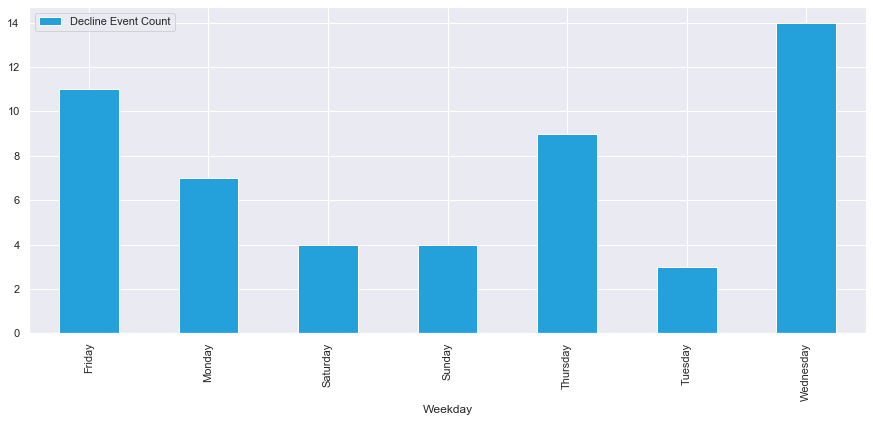

In [28]:
#filter the dataframe down to decline events only
step = ['Decline Offer clicked']
decline_df = df[df['event_name'].isin(step)]

decline_monthly = decline_df.groupby( [ "Weekday Name"] )['user_id'].count().reset_index()
decline_monthly.columns = ['Weekday', 'Decline Event Count']
decline_monthly = decline_monthly.set_index('Weekday')
decline_monthly.plot.bar(figsize=(15, 6),color='#24a0db')